#  Step 1: Importing Libraries

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Creating SQLite Database and Table with Sample Data

In [3]:
# Connect to (or create) the SQLite database
conn = sqlite3.connect("sales_data.db")

# Create a cursor to execute SQL commands
cursor = conn.cursor()

# Create the sales table (only if it doesn't exist)
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

# Clear existing data to avoid duplicates
cursor.execute('DELETE FROM sales')

# Insert sample sales data
sample_data = [
    ('Pen', 10, 1.5),
    ('Pencil', 20, 0.5),
    ('Notebook', 5, 3.0),
    ('Pen', 15, 1.5),
    ('Pencil', 10, 0.5)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)

# Commit changes and close the cursor
conn.commit()

#  Step 3: Total Quantity & Revenue per Product

In [4]:
# SQL query to summarize quantity and revenue by product
query = '''
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''

# load results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Display the DataFrame in the console
print(df)

    product  total_qty  revenue
0  Notebook          5     15.0
1       Pen         25     37.5
2    Pencil         30     15.0


# Step 4: Plotting Bar Chart of Revenue by Product

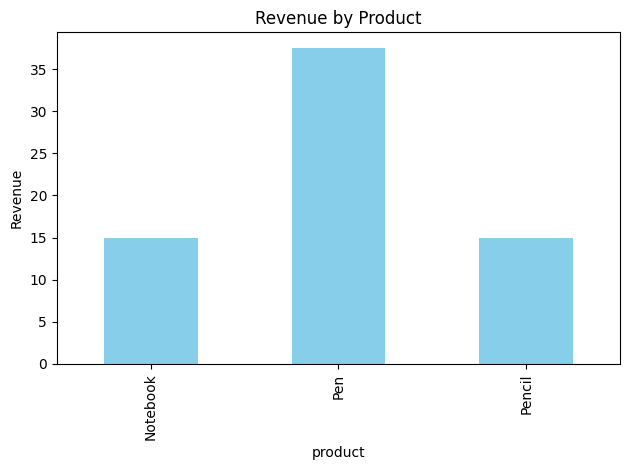

In [5]:
# Create a simple bar chart using matplotlib
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')

# Add labels and title
plt.ylabel("Revenue")
plt.title("Revenue by Product")

# Show the plot
plt.tight_layout()
plt.show()

# Step 5: Saving the Plot to File

In [7]:
# Save the chart as a PNG image
plt.savefig("sales_chart.png")

<Figure size 640x480 with 0 Axes>